In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import os
from Dataset.MakeDataset import X,y
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
Training output data shape:  (126,)
Testing output data shape:  (54,)


In [2]:
# X.shape, y.shape
def label(x):
    dict1 = {1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"}
    return dict1[x]
# y = y.apply(label)
# y
# X = X.reshape(180,-1)
X.shape
# X[[[0]]].shape
# X = X[:,1,:]
X_tfsel = X
X = X.mean(axis=1)
# X= X.reshape(180,500)
# y = label(y)
y_labels = []
for i in range(len(y)):
    y_labels.append(label(y[i]))
# X.shape

# print(100*X.var(axis=1)/X.mean(axis=1)).shape


In [3]:
X_1 = X[:,0]
Y_1 = X[:,1]
Z_1 = X[:,2]

(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3) (126,)
(126, 3)

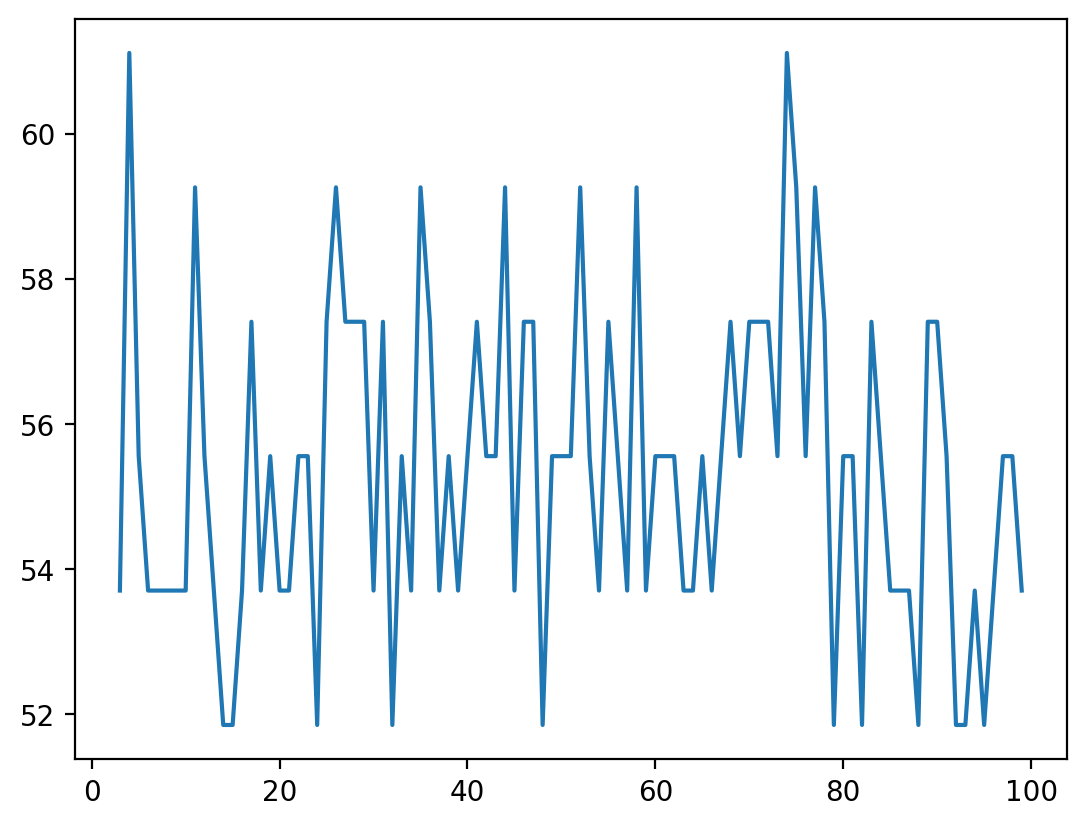

In [4]:
X_list = []
y_list = []

for i in range(3,100):
    X_list.append(i)
    dt = DecisionTreeClassifier(criterion='gini', max_depth=i)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20,stratify=y)
    print(X_train.shape, y_train.shape)
    dt.fit(X_train, y_train)
    y_predicted = dt.predict(X_test)
    y_predicted
    y_predicted = pd.DataFrame({'Label':y_predicted})
    accuracy = len(y_predicted[y_predicted['Label']==y_test])/len(y_test)
    y_list.append(accuracy*100)

plt.plot(X_list, y_list)
plt.show()


In [5]:
print(max(y_list))

61.111111111111114


In [6]:
# Install TSFEL if not already installed
# !pip install tsfel

import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Assuming X has shape (180, 500, 3)

# Define an empty DataFrame to store extracted features
import pandas as pd
features_df = pd.DataFrame()
cfg = tsfel.get_features_by_domain()
# Extract features for each axis (X, Y, Z) separately and concatenate
for i in range(X_tfsel.shape[0]):
    # Extract features for each axis
    tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])
                                for j in range(X_tfsel.shape[2])], axis=1)
    
    # Append to the features DataFrame
    features_df = pd.concat([features_df, tsfel_features], ignore_index=True)

# Convert features DataFrame to numpy array
X_features = features_df.to_numpy()

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/3801869105.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel[i, :, j])



*** Feature extraction finished ***
Accuracy: 0.7222
Precision: 0.7523
Recall: 0.7222
Confusion Matrix:
[[4 1 1 0 0 0]
 [1 4 2 0 0 0]
 [0 1 2 0 0 0]
 [0 0 0 5 1 0]
 [0 0 0 3 5 0]
 [0 0 0 0 0 6]]


In [7]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7222
Precision: 0.7523
Recall: 0.7222
Confusion Matrix:
[[4 1 1 0 0 0]
 [1 4 2 0 0 0]
 [0 1 2 0 0 0]
 [0 0 0 5 1 0]
 [0 0 0 3 5 0]
 [0 0 0 0 0 6]]


In [8]:
import pandas as pd
from sklearn.metrics import accuracy_score
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

X_features = pd.read_csv(os.path.join(train_path,"X_train.txt"), delim_whitespace=True, header=None)
featurel = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"), delim_whitespace=True, header=None)
featurelist = list(featurel.loc[:,1])
X_features.columns = featurelist
y_features = pd.read_csv(os.path.join(train_path,"y_train.txt"), delim_whitespace=True, header=None)
X_features_test = pd.read_csv(os.path.join(test_path,"X_test.txt"), delim_whitespace=True, header=None)
X_features_test.columns = featurelist
y_features_test = pd.read_csv(os.path.join(test_path,"y_test.txt"), delim_whitespace=True, header=None)

/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/1860018030.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_features = pd.read_csv(os.path.join(train_path,"X_train.txt"), delim_whitespace=True, header=None)
/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/1860018030.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  featurel = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"), delim_whitespace=True, header=None)
/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1496/1860018030.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_features = pd.read_csv(os.path.join(train_path,"y_train.txt"), delim_whitespace=True, header=None)
/var/folders/

In [9]:
X_features.shape, y_features.shape

((7352, 561), (7352, 1))

In [10]:
maxd = 0
max_accuracy = 0



for i in range(3,30):
    
    dt = DecisionTreeClassifier(criterion='gini', max_depth=i)
    X_train,X_test,y_train,y_test = train_test_split(X_features,y_features,test_size=0.3,random_state=20,stratify=y_features)
    print(X_train.shape, y_train.shape)
    dt.fit(X_train, y_train)
    y_predicted = dt.predict(X_test)
    print(y_predicted.shape)
    y_predicted = pd.Series(y_predicted, index=y_test.index)
    accuracy = accuracy_score(y_test, y_predicted)
    print(accuracy*100)
    if accuracy*100>max_accuracy:
        maxd = i
        max_accuracy = accuracy * 100

(5146, 561) (5146, 1)
(2206,)
78.69446962828648
(5146, 561) (5146, 1)
(2206,)
88.93925657298277
(5146, 561) (5146, 1)
(2206,)
90.57116953762467
(5146, 561) (5146, 1)
(2206,)
92.8377153218495
(5146, 561) (5146, 1)
(2206,)
94.01631912964642
(5146, 561) (5146, 1)
(2206,)
94.01631912964642
(5146, 561) (5146, 1)
(2206,)
94.15231187669991
(5146, 561) (5146, 1)
(2206,)
94.01631912964642
(5146, 561) (5146, 1)
(2206,)
93.60834088848596
(5146, 561) (5146, 1)
(2206,)
93.74433363553943
(5146, 561) (5146, 1)
(2206,)
93.33635539437897
(5146, 561) (5146, 1)
(2206,)
93.69900271985495
(5146, 561) (5146, 1)
(2206,)
93.88032638259293
(5146, 561) (5146, 1)
(2206,)
93.92565729827741
(5146, 561) (5146, 1)
(2206,)
93.83499546690844
(5146, 561) (5146, 1)
(2206,)
93.74433363553943
(5146, 561) (5146, 1)
(2206,)
93.38168631006346
(5146, 561) (5146, 1)
(2206,)
93.83499546690844
(5146, 561) (5146, 1)
(2206,)
93.38168631006346
(5146, 561) (5146, 1)
(2206,)
92.88304623753399
(5146, 561) (5146, 1)
(2206,)
94.10698096

In [11]:
print(max_accuracy)
print(maxd)

94.15231187669991
9
